# Machine Learning Practice
The purpose of this notebook is to practice how to analyze NYSE companies using ML. Being that this is a personal interest of mine, I thought it would be fun to continue improving my analysis skills all while I learn how to become a hedge fund manager. 

It wouldn't be rigth if I didn't create a fictional company to present my findings to you! Ladies and gents, I give you: ***ToDig Co. est. 2015***

**Lets get started !!!!!!!!**

# Todo List 
**(Subject To Change)**
- Import Required Libraries 
- Import Stock Price History of Intel Corporation, QUALCOMM, Inc., and Infineon Technologies AG


In [1]:
# Data Importing and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

# Stock market Data Library
import yfinance as yf


# Time series handling 
import datetime
from datetime import date



In [2]:
# Downloading historical price data for Intel Corporation, QUALCOMM, Inc., and Infineon Technologies AG
hist_INTC = yf.download('INTC')
hist_IFNNY = yf.download('IFNNY')
hist_QCOM = yf.download('QCOM')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Quick Look
Now that we have three companie we want to look into, lets quickly glance at one of the companies to see what we have: columns, rows, dataframe size, etc...

In [3]:
hist_INTC.head() # Preview of the imported data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.203600,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.201971,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.206857,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.206043,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.198713,12172800


In [4]:
hist_INTC.info() # Previewing data types of the colums 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10173 entries, 1980-03-17 to 2020-07-20
Data columns (total 6 columns):
Open         10173 non-null float64
High         10173 non-null float64
Low          10173 non-null float64
Close        10173 non-null float64
Adj Close    10173 non-null float64
Volume       10173 non-null int64
dtypes: float64(5), int64(1)
memory usage: 556.3 KB


In [5]:
type(hist_INTC.index) # Prviewing the data type of the index of the data frame to see if it needs to be converted

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
hist_INTC.describe() # Previewing the stats of the prices for each column

,Open,High,Low,Close,Adj Close,Volume
count,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,1.017300e+04
mean,18.080563,18.331896,17.833449,18.081363,13.901601,5.156794e+07
std,16.444926,16.682803,16.217631,16.447440,14.222392,3.553472e+07
min,0.218750,0.218750,0.216146,0.216146,0.135190,0.000000e+00
25%,1.151042,1.171875,1.130208,1.156250,0.723187,2.731200e+07
50%,19.350000,19.593750,19.120001,19.360001,12.926133,4.597840e+07
75%,27.610001,27.950001,27.219999,27.600000,19.629557,6.612960e+07
max,75.625000,75.828125,73.625000,74.875000,67.751747,5.677088e+08


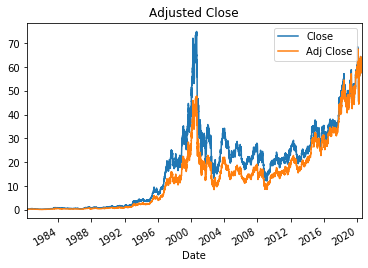

In [7]:
# Quick glance at the increase of the Adjusted Close price of INTC
hist_INTC[['Close', 'Adj Close']].plot()
plt.title('Adjusted Close')
plt.show()

# What Do You See?
- The index is already set to datetime series (making the data frame easy to work with during modeling)
- The columns will be easy to work with because they all have the data type float
- The Max of the viewed stock is fairly high compared to the other prices in the description of the columns (price range that may need to be scaled during the modeling process)
- The line plot provides a visual representation of the spick in price! (Later on I will be conducting NLP of documents that could possibly tell us why this happened.... see Q. Quarterly Repository for the beginning stages of this: https://github.com/bmor2552/QQuarterlyInc)


**Sidenote** Quantitive Analysis for fundamentals:
Definition: Fundamentals that can be quatified.
- Assets
- Liabilities
- Revenue, Earnings, Cash Flow, etc...
- Ratios (PB, P/E, P/CF, etc.. )

**What to focus on:**
- Earnings and Net Income
Example: If new mangement steps in and the company begins to do better quater after quater this may be a good metric to determine if you should invest into the company before main stream traders grab hold of it!


See link for more info on the list provided above: https://www.youtube.com/watch?time_continue=234&v=Ytw_qqgRBOY&feature=emb_logo

# Looking at Adjusted Close Prices

Now, when it comes to the stock market it is closed for weekends as well as holidays(Which are different from fed holidays). A good reference to use is the SPY. This is because when the SPY trades, then all the stocks are trading. This is also the case when the SPY is not trading. For reference of the correct dates we need for our analysis we will download SPY price history and create a data frame that has the adjusted close prices for the correct days that reflect when the stock market is open.  

In [8]:
hist_SPY = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


Now lets create a df that has the adjusted close for all four stock we are interested in: INTC, IFNNY, QCOM, and SPY. To do that we will have to use the ***.join()*** function. 

In [12]:
# Turning the wanted columns of each stock into a data frame 
INTC_df = pd.DataFrame(hist_INTC['Adj Close']) 
IFNNY_df = pd.DataFrame(hist_IFNNY['Adj Close']) 
QCOM_df = pd.DataFrame(hist_QCOM['Adj Close']) 
SPY_df = pd.DataFrame(hist_SPY['Adj Close'])

In [14]:
# Checking my work 
print(type(INTC_df))
print(type(IFNNY_df))
print(type(QCOM_df))
print(type(SPY_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
# Changing the column name to its corresponding ticker symbol for each stock
INTC_df.rename(columns = {'Adj Close': 'INTC'}, inplace= True )
IFNNY_df.rename(columns = {'Adj Close': 'IFNNY'}, inplace= True)
QCOM_df.rename(columns = {'Adj Close': 'QCOM'}, inplace= True)
SPY_df.rename(columns = {'Adj Close': 'SPY'}, inplace= True)

In [22]:
df = pd.concat([SPY_df, INTC_df, IFNNY_df, QCOM_df], axis=1, join='inner') # Joining all four data frames

In [29]:
df.head() # Checking my work 

,SPY,INTC,IFNNY,QCOM
Date,,,,
2000-03-13,94.302399,38.922985,58.987511,45.343166
2000-03-14,92.962761,37.568447,64.728256,43.579929
2000-03-15,95.131630,38.305477,59.830185,44.581268
2000-03-16,99.575645,39.859215,59.514183,46.279194
2000-03-17,100.233749,41.393044,58.408169,47.454681


In [28]:
df.isnull().sum() # Checking for any missing values

SPY      0
INTC     0
IFNNY    0
QCOM     0
dtype: int64


In [30]:
df.info() # Details of the data frame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5121 entries, 2000-03-13 to 2020-07-20
Data columns (total 4 columns):
SPY      5121 non-null float64
INTC     5121 non-null float64
IFNNY    5121 non-null float64
QCOM     5121 non-null float64
dtypes: float64(4)
memory usage: 200.0 KB


In [33]:
df.describe() # Checking the statistic of the data frame

,SPY,INTC,IFNNY,QCOM
count,5121.000000,5121.000000,5121.000000,5121.000000
mean,137.959098,23.842089,13.717451,39.561876
std,69.700119,12.720535,10.167539,17.781376
min,53.947025,8.478086,0.394844,8.271916
25%,87.068596,15.047172,7.888305,26.633854
50%,107.026009,18.556349,10.517734,35.874001
75%,185.075211,29.566643,17.228794,52.135300
max,334.888397,67.751747,73.576378,94.422256


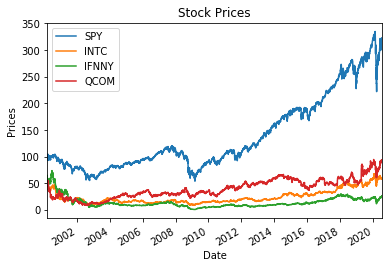

In [43]:
df.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show() # Quick Visual of the data

**Now that we have out data frame, lets get to WORK!!!**
# Not So Fast!
Before we begin our analysis it is important to normalize our price data. This makes the analyzing process easier by changing the price data range from one that might trick a model into thinking there are outliers (When really one stock is just priced higher than anther) to one that will tell the model that all prices start from one and either increase or decrease from there. 

*Remember computers are not that smart without human input, so it is important that we make this change to help the models we run properly understand the price range of our stocks.*

In [48]:
# Normalize the data aka adjust the scale of stock history
df = df/df.iloc[0, :]

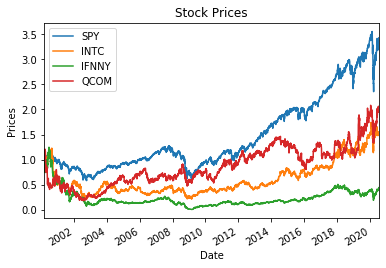

In [50]:
df.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

***Can you spot the difference between the first plot and the second one?***
The gap between SPY and the other stocks has decreased and the price/ x axis has changed from whole numbers to decimals.